In [ ]:
%load_ext cython 

In [ ]:
%%cython 
import numpy as np 
cimport numpy as np 
cdef float f(float x):
    return -x
cdef first_order_ODE(double initial_condition,float (*f)(float),double h,float simulation_time,float time_unit,int sampling_time):
    cdef int N=int(simulation_time/(h*time_unit))
    cdef np.ndarray[np.float64_t, ndim=1] xlist=np.zeros(int(N/sampling_time)+1)
    cdef np.ndarray[np.float64_t, ndim=1] xtemp=np.zeros(2)

    cdef double x=initial_condition+f(initial_condition)*h
    xtemp[0]=initial_condition
    xtemp[1]=x
    cdef int i
    cdef int counter=0
    for i in range(N):
        x=xtemp[0]+2*f(xtemp[1])*h
        xtemp[0]=xtemp[1]
        xtemp[1]=x
        if i%sampling_time==0:
            xlist[counter]=x
            counter+=1
        
    return xlist  
cdef float R=3000
cdef float C=10.0**(-6)
cdef float V=10**1
cdef float t=20*10.0**(-3)
cdef float Q0=0
cdef float time_unit=R*C

cdef float h=5*10.0**(-2)
cdef float reduced_Q0=Q0-(C*V)
cdef int sampling_time=1

x=first_order_ODE(reduced_Q0,f,h,t,time_unit,sampling_time)


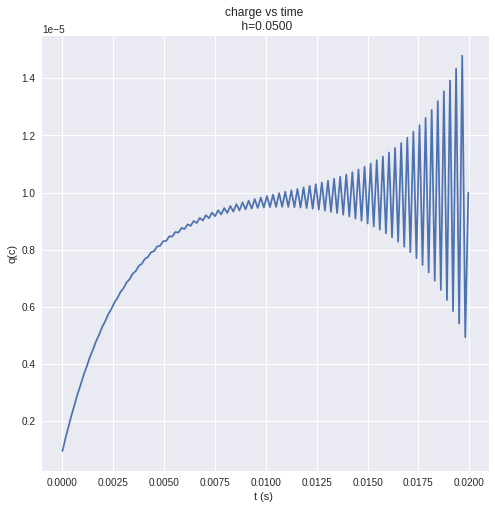

In [ ]:
import matplotlib.pyplot as plt 

R=3000
C=10.0**(-6)
V=10**1
t=20*10.0**(-3)
Q0=0

time_unit=R*C

h=5*10.0**(-2)
reduced_Q0=Q0/(C*V)
sampling_time=1

plt.style.use('seaborn')
plt.figure(figsize=(8,8))
plt.plot(np.arange(len(x))*sampling_time*h*time_unit,C*V+x)
plt.xlabel('t (s) ')
plt.ylabel('q(c)')
plt.title('charge vs time \n h=%.4f'%h)
plt.savefig('EX3-1.png',bbox_inches='tight')
plt.show()